In [11]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [10]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Manisha
[nltk_data]     Chandanshiv\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
df = pd.read_csv("C://Users//Manisha Chandanshiv//OneDrive//ドキュメント//Excelr assignment Questions//Data Science//Naive Bayes and Text Mining//Naive Bayes and Text Mining//blogs_categories.csv")

print("Dataset shape:", df.shape)
print(df.head())
print(df['Labels'].value_counts())

Dataset shape: (19997, 3)
   Unnamed: 0                                               Data       Labels
0           0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism
1           1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
2           2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
3           3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
4           4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.ma

In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned'] = df['Data'].astype(str).apply(preprocess)

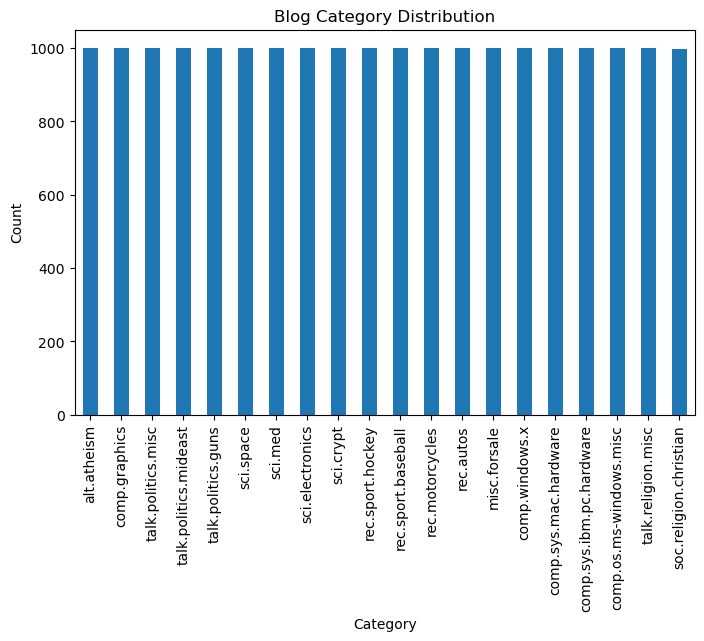

In [18]:
plt.figure(figsize=(8,5))
df['Labels'].value_counts().plot(kind='bar')
plt.title('Blog Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

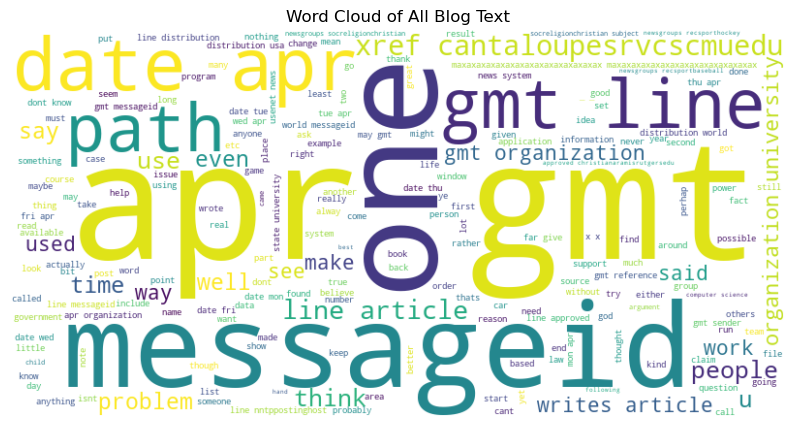

In [19]:
text_all = " ".join(df['cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Blog Text")
plt.show()

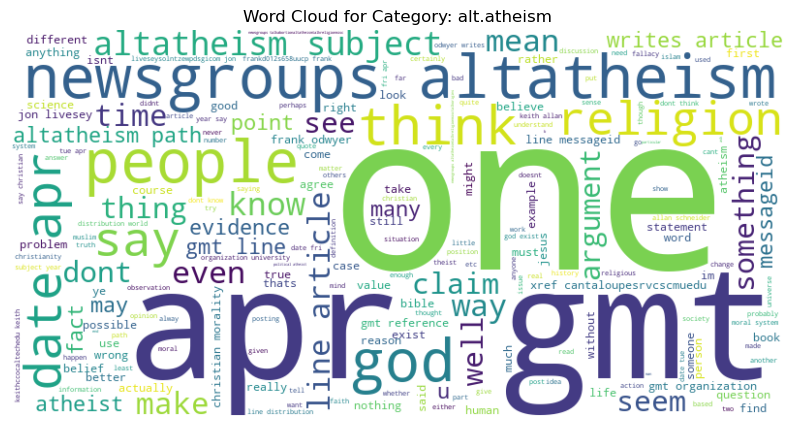

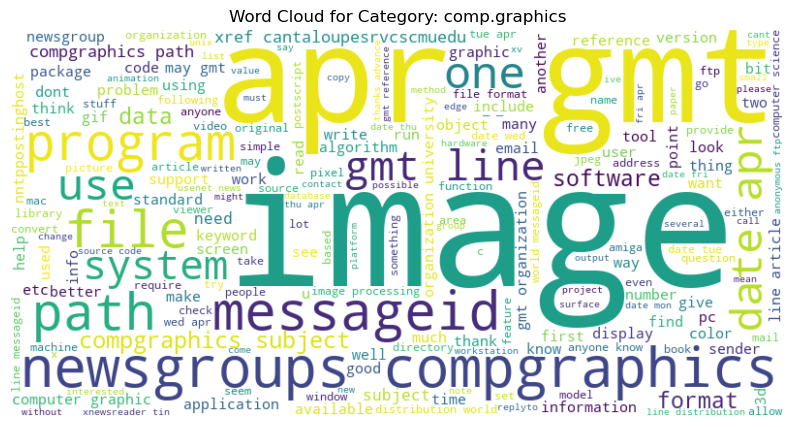

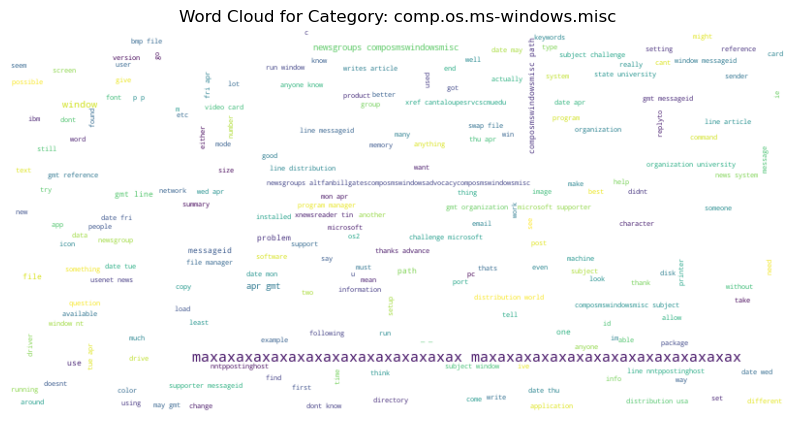

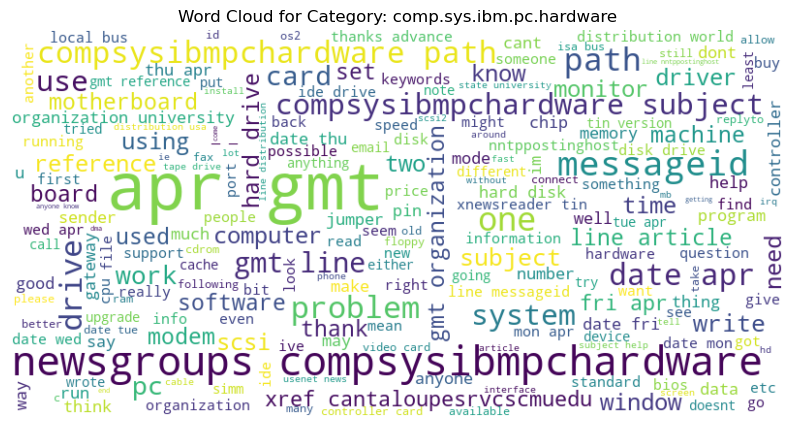

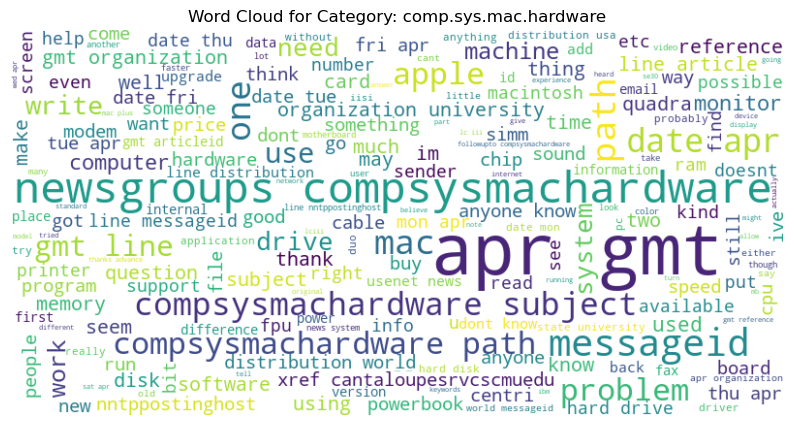

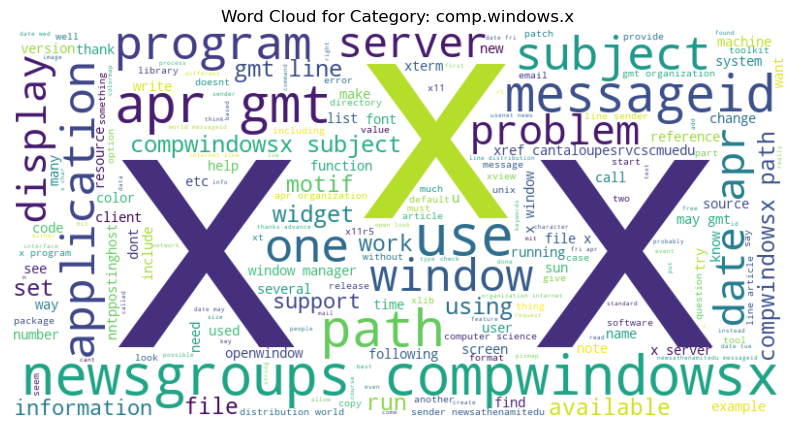

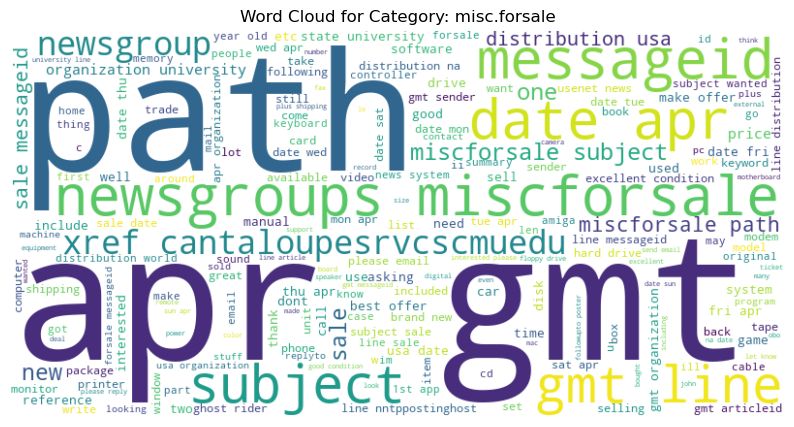

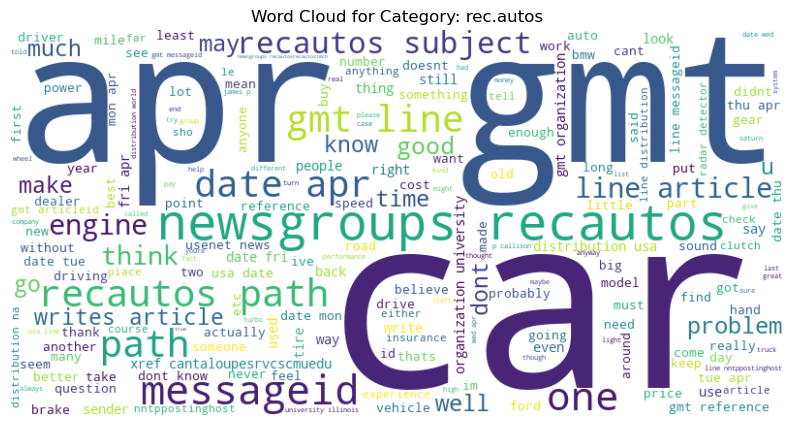

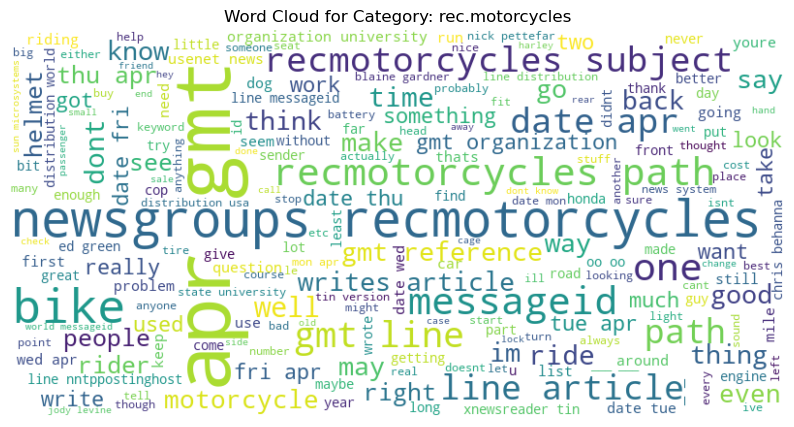

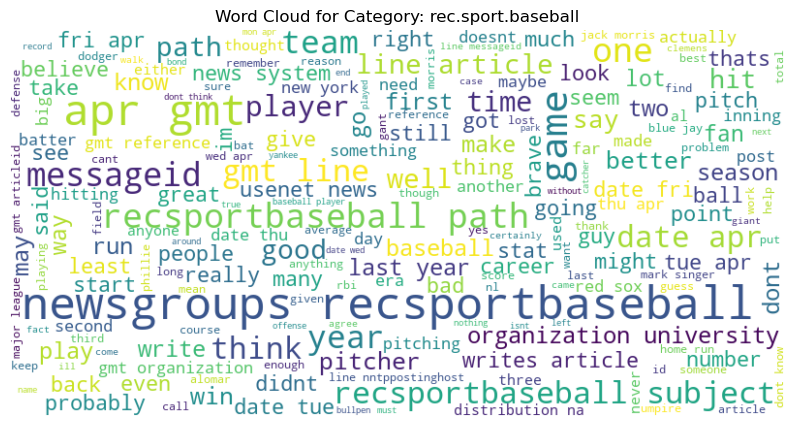

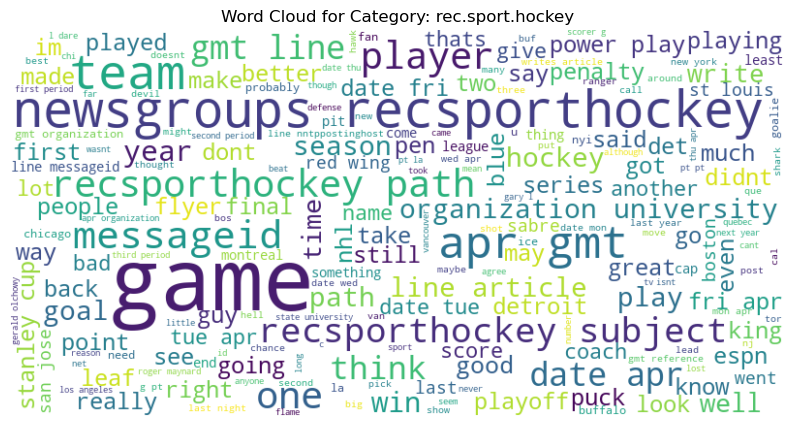

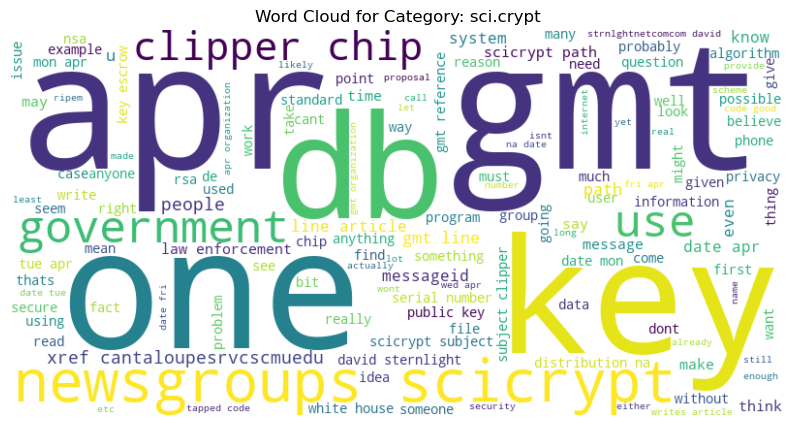

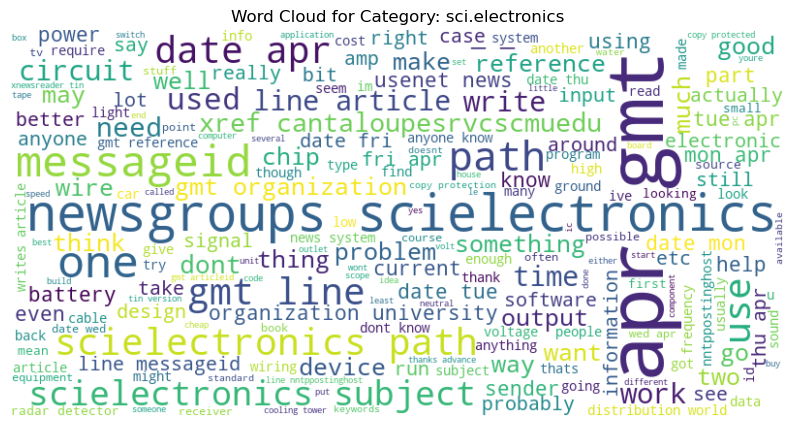

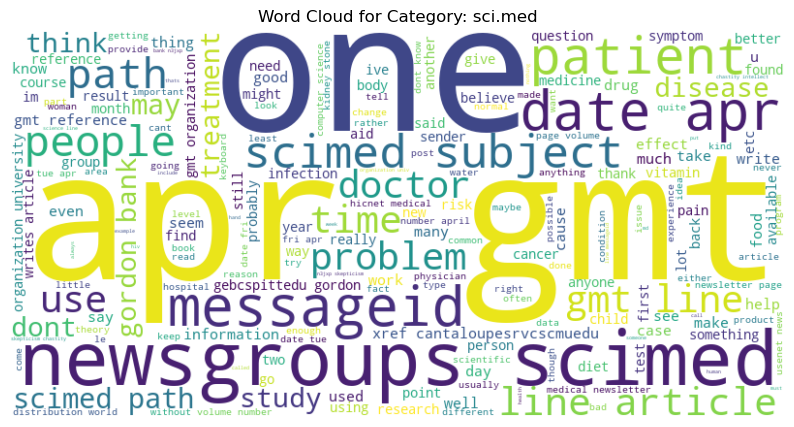

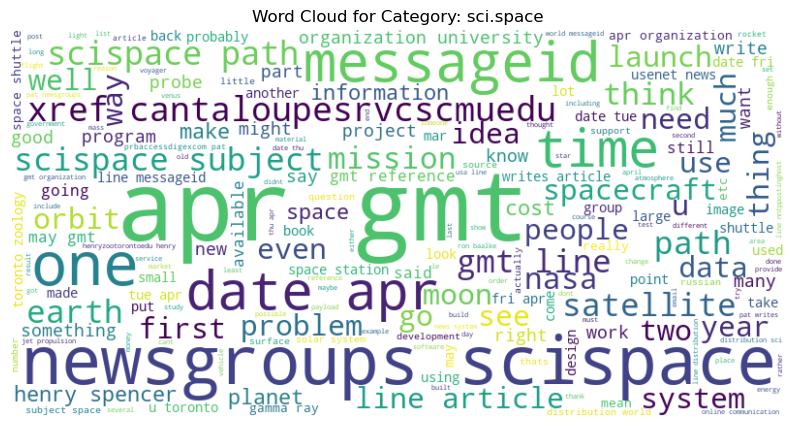

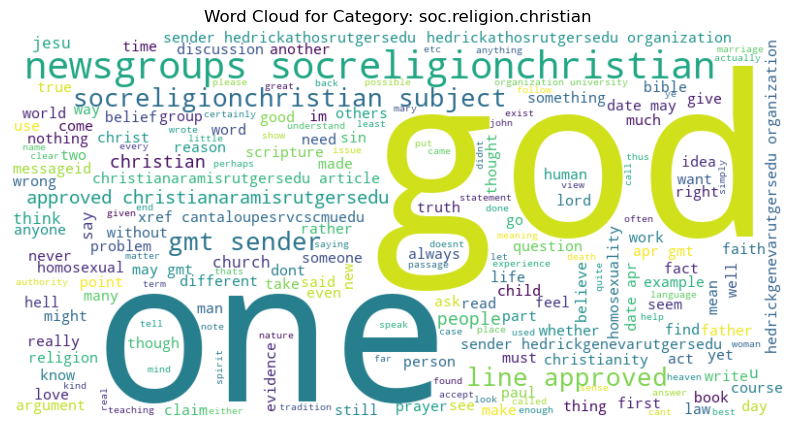

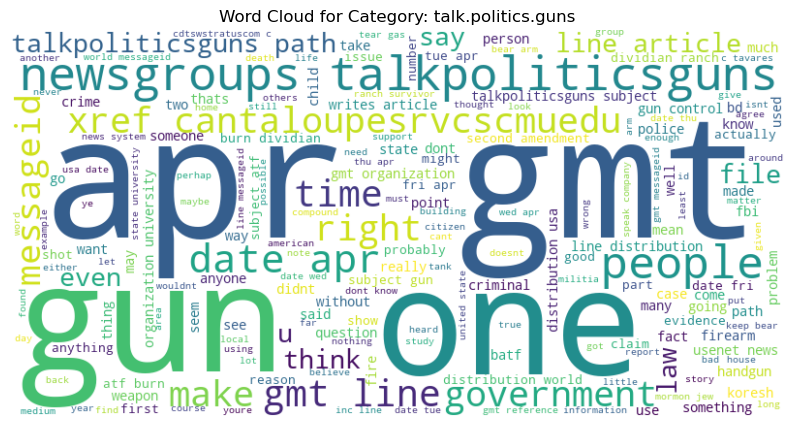

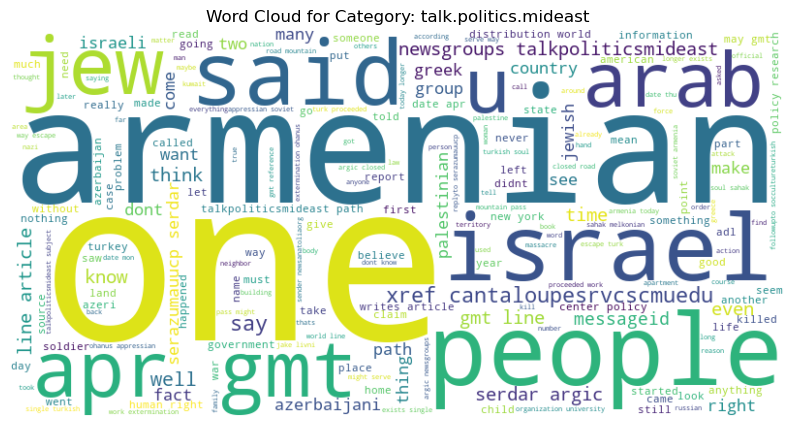

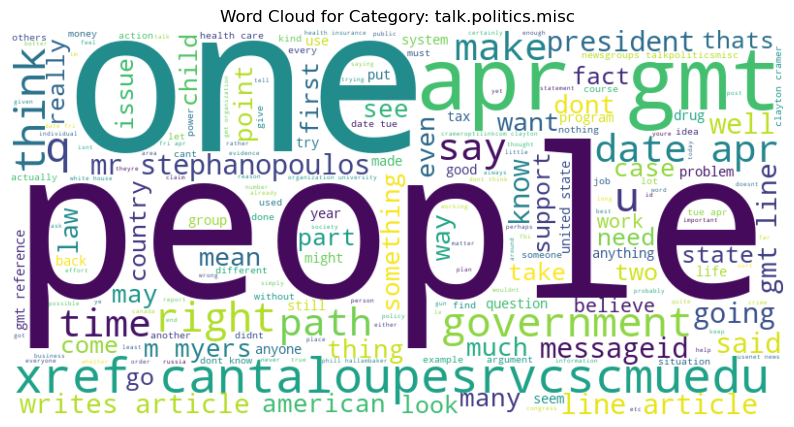

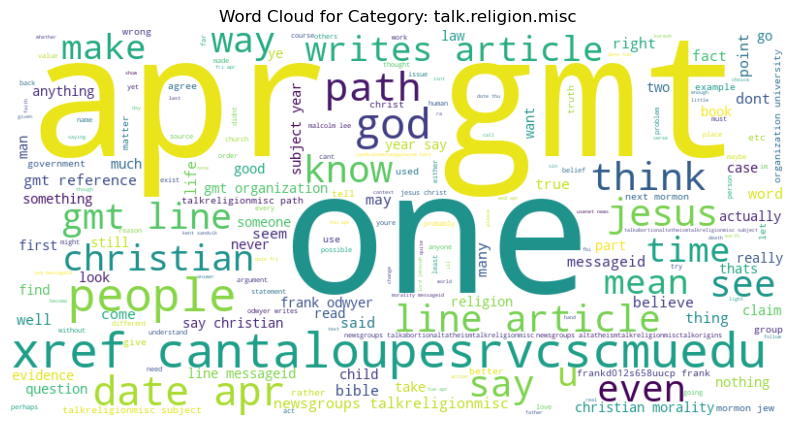

In [20]:
categories = df['Labels'].unique()
for cat in categories:
    text_cat = " ".join(df[df['Labels'] == cat]['cleaned'])
    wordcloud_cat = WordCloud(width=800, height=400, background_color='white').generate(text_cat)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud_cat, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Category: {cat}")
    plt.show()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(corpus, n=10, ngram_range=(2,2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    words = [w for w,f in words_freq]
    freqs = [f for w,f in words_freq]
    
    plt.figure(figsize=(8,5))
    plt.barh(words[::-1], freqs[::-1])
    plt.title(f'Top {n} Bigrams')
    plt.xlabel('Frequency')
    plt.show()

In [27]:
print(df['Labels'].value_counts())


alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
Name: Labels, dtype: int64


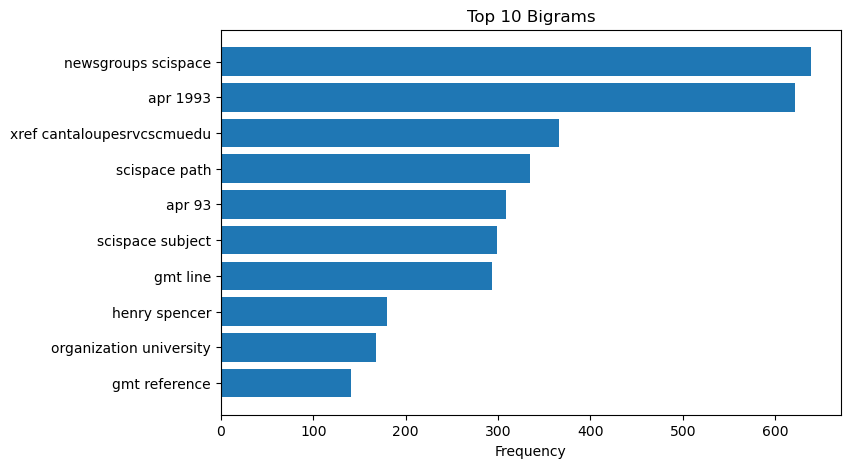

In [28]:
category_sample = 'sci.space'  # pick any label from the value_counts list
corpus_cat = df[df['Labels'] == category_sample]['cleaned']
plot_top_ngrams(corpus_cat)


In [29]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned'])


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Labels'], test_size=0.2, random_state=42, stratify=df['Labels'])

In [31]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8775

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.78      0.83      0.81       200
           comp.graphics       0.77      0.89      0.83       200
 comp.os.ms-windows.misc       0.88      0.83      0.85       200
comp.sys.ibm.pc.hardware       0.86      0.89      0.87       200
   comp.sys.mac.hardware       0.92      0.91      0.92       200
          comp.windows.x       0.89      0.94      0.92       200
            misc.forsale       0.86      0.87      0.87       200
               rec.autos       0.92      0.91      0.91       200
         rec.motorcycles       0.97      0.96      0.97       200
      rec.sport.baseball       0.97      0.97      0.97       200
        rec.sport.hockey       0.98      0.98      0.98       200
               sci.crypt       0.94      0.94      0.94       200
         sci.electronics       0.88      0.91      0.89       200
                 sci.med       0.

In [32]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_score'] = df['Data'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df['sentiment'] = df['sentiment_score'].apply(get_sentiment)

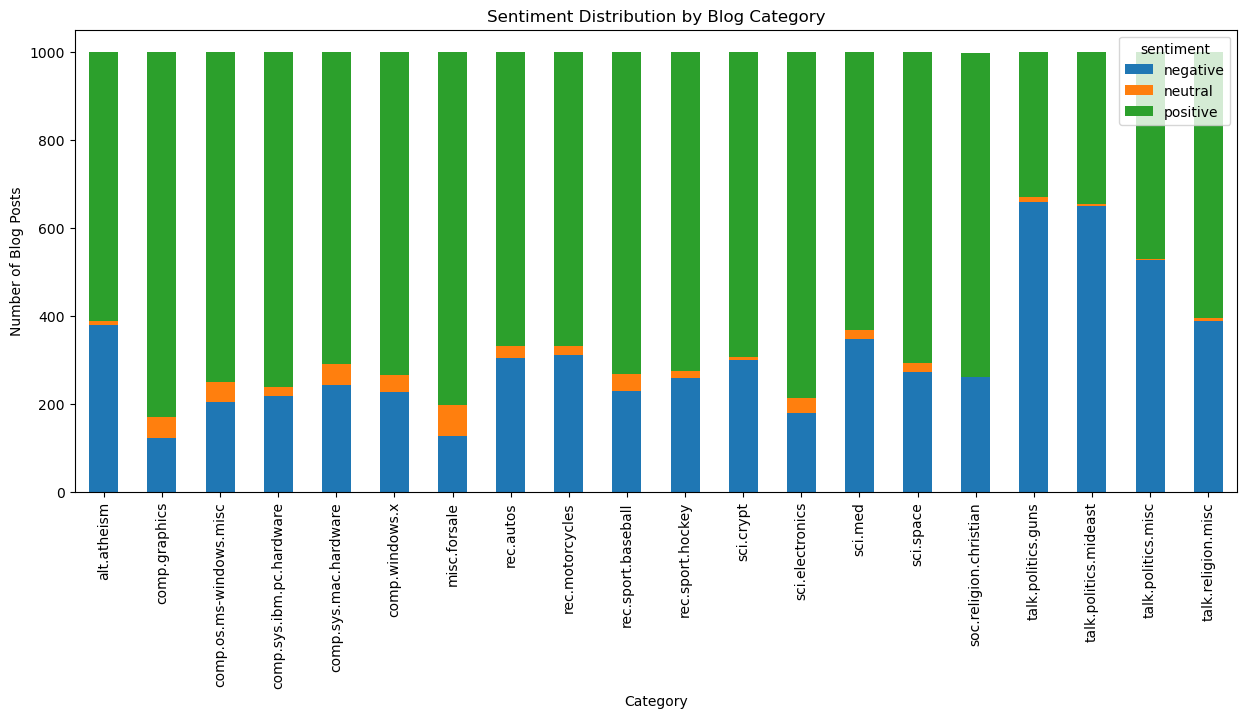

In [33]:
sentiment_dist = df.groupby(['Labels', 'sentiment']).size().unstack(fill_value=0)
sentiment_dist.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Sentiment Distribution by Blog Category')
plt.xlabel('Category')
plt.ylabel('Number of Blog Posts')
plt.show()

# Evaluation

#### Naive Bayes Performance:
The model achieved about 88% accuracy with strong precision and recall in most categories, especially technical and sports. However, it struggled with some political and religion-related categories due to overlapping language and subtle nuances.

#### Challenges:
Similar vocabulary across categories
Difficulty capturing nuanced contexts like sarcasm
Potential loss of meaning during text cleaning

#### Sentiment Analysis:
Most categories showed predominantly positive sentiment, except politics and religion, which had more negative tones. This reflects the nature of the content and emotional intensity in those topics.

#### Implications:
Sentiment insights can help improve classification and guide content strategies, highlighting areas for future enhancements.

# Interview Questions


#### 1. Difference between Precision and Recall:
Precision = TP / (TP + FP)
→ How many predicted positives are actually correct.

Recall = TP / (TP + FN)
→ How many actual positives the model correctly identified.

Precision focuses on accuracy of positive predictions,
Recall focuses on capturing all actual positives.


#### 2. What is Cross-Validation and its importance?
Cross-validation splits data into multiple parts to train and test the model on different subsets.

K-Fold is common: data is split into K parts, trained on K−1 and tested on 1, repeated K times.

Importance: Gives a more reliable model performance estimate and helps prevent overfitting.